# Visualization of tif files

In [26]:
ls

 Volume in drive C is Windows7_OS
 Volume Serial Number is 5817-805F

 Directory of C:\Users\lucam\OneDrive\Documenti\KTH\2nd_year\ESA_Thesis\floatingobjects\code\notebooks

2023-01-31  10:51    <DIR>          .
2023-01-31  10:51    <DIR>          ..
2023-01-30  18:27    <DIR>          .ipynb_checkpoints
2023-01-23  18:37                 0 __init__.py
2023-01-31  10:17           802ÿ951 visualize_shp.ipynb
2023-01-31  10:51           320ÿ979 visualize_tif.ipynb
2023-01-23  18:37             2ÿ597 visualize_tif.py
               4 File(s)      1ÿ126ÿ527 bytes
               3 Dir(s)  60ÿ317ÿ044ÿ736 bytes free


In [27]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt
import matplotlib
from data import l2abands, l1cbands
from skimage.exposure import equalize_hist
from transforms import calculate_fdi, calculate_ndvi

In [28]:
def acquire_data(file_name):
    """Read an L1C Sentinel-2 image from a cropped TIF. The image is represented as TOA reflectance.
    Args:
        file_name (str): event ID.
    Raises:
        ValueError: impossible to find information on the database.
    Returns:
        np.array: array containing B8A, B11, B12 of a Seintel-2 L1C cropped tif.
        dictionary: dictionary containing lat and lon for every image point.
    """

    with rasterio.open(file_name) as raster:
        img_np = raster.read()
        sentinel_img = img_np.astype(np.float32)
        height = sentinel_img.shape[1]
        width = sentinel_img.shape[2]
        cols, rows = np.meshgrid(np.arange(width), np.arange(height))
        xs, ys = rasterio.transform.xy(raster.transform, rows, cols)
        lons = np.array(ys)
        lats = np.array(xs)
        coords_dict = {"lat": lats, "lon": lons}

    sentinel_img = (
        sentinel_img.transpose(1, 2, 0) / 10000 + 1e-13
    )  # Diving for the default quantification value

    return sentinel_img, coords_dict

In [29]:
def load_convert_tiff(tiff):

    with rasterio.open(tiff) as src:
        arr = src.read()
        meta = src.meta

    if arr.shape[0] == 12:
        bands = l2abands
    elif arr.shape[0] == 13:
        bands = l1cbands
    else:
        raise ValueError("expected tiff to have either 12 (L2A) or 13 (L1C) bands")

    rgb = equalize_hist(arr[[bands.index("B4"), bands.index("B3"), bands.index("B2")]])

    cmap_magma = matplotlib.cm.get_cmap('magma')
    cmap_viridis = matplotlib.cm.get_cmap('viridis')

    norm_fdi = matplotlib.colors.Normalize(vmin=0, vmax=0.1)
    norm_ndvi = matplotlib.colors.Normalize(vmin=-.4, vmax=0.4)

    ndvi = cmap_viridis(norm_ndvi(calculate_ndvi(arr)))
    ndvi = np.rollaxis(ndvi, axis=2)
    fdi = cmap_magma(norm_fdi(calculate_fdi(arr)))
    fdi = np.rollaxis(fdi, axis=2)
    return rgb, ndvi, fdi, meta

In [30]:
allregions = ["accra_20181031", "biscay_20180419", "danang_20181005",
              "kentpointfarm_20180710", "kolkata_20201115", "lagos_20190101",
              "lagos_20200505", "london_20180611", "longxuyen_20181102",
              "mandaluyong_20180314", "neworleans_20200202", "panama_20190425",
              "portalfredSouthAfrica_20180601", "riodejaneiro_20180504",
              "sandiego_20180804", "sanfrancisco_20190219", "shengsi_20190615",
              "suez_20200403", "tangshan_20180130", "toledo_20191221",
              "tungchungChina_20190922", "tunisia_20180715",
              "turkmenistan_20181030", "venice_20180630", "venice_20180928",
              "vungtau_20180423"
    ]

(5380, 10283)


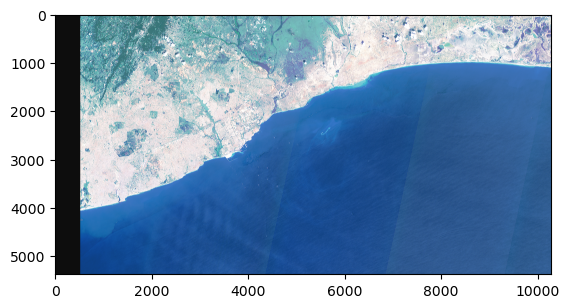

In [ ]:
path = "../../data2/data/"
ext = ".tif"


for region_name in allregions:
    sentinel_img, coords_dict = acquire_data(path + region_name + ext)
    print(coords_dict['lat'].shape)
    rgb, ndvi, fdi, meta = load_convert_tiff(path + region_name + ext)
    plt.imshow(np.moveaxis(rgb, 0, -1))
    plt.show()



#sentinel_img, coords_dict = acquire_data(path + region_name + ext)
#for i in range(0, 11):
#    plt.imshow(sentinel_img[:, :, i:i+3])
#    plt.show()
#print(coords_dict['lat'].shape)

#rgb, ndvi, fdi, meta = load_convert_tiff(path + region_name + ext)
#plt.imshow(np.moveaxis(rgb, 0, -1))
#plt.show()
